# Prueba técnica 

#####  Daniel R. Sánchez González [Vacante: Jefe de compras e importaciones]

## Primera parte

##### ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

##### En la inteligencia artificial el simple hecho de contar con más observaciones puede hacer mejorar el proceso de aprendizaje. Sin embargo, existen variables que pueden explicar fuertemente el precio de los bienes raíces. Entre estas características se encuentran el área, el número de habitaciones, el número de baños, la altura si aplica, los acabados, los años de antiguedad, el área en balcones, terrazas, patios, mezzanines o altillos, el número de parqueaderos, las amenidades privadas del inmueble como piscina, jacuzzi o ascensores, las amenidades de la propiedad horizontal como parques, jardínes, canchas, piscinas, sala de conductores o gimnasios, y las amenidades del sector como parques, centros comerciales, estaciones de sistema de transporte público y seguridad. 

## Segunda parte

##### 0. Importa las librerías necesarias para trabajar en la consigna.

In [18]:
import numpy as np                                       # Swiss nife
import pandas as pd                                      # DataFrames and Series handling
import seaborn as sns                                    # Graphs
import matplotlib.pyplot as plt                          # Graphs editing
from sklearn.model_selection import train_test_split     # Splitting data
from sklearn.preprocessing import StandardScaler         # Standarize data
from sklearn.neighbors import KNeighborsRegressor        # KNN algorithm
from sklearn.ensemble import RandomForestRegressor       # Random Forest Regression algorithm
from sklearn.metrics import mean_squared_error           # Selected metric
from sklearn.svm import SVR

##### 1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [19]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')   # Upload DataFrame

print('\n¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?\n\n'+ 'El tamaño del dataset es', 
      str(df.shape)+ '. Con', str(df.shape[0]), 'columnas y ', str(df.shape[1]), 'columnas.\n')


¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?

El tamaño del dataset es (146660, 19). Con 146660 columnas y  19 columnas.



##### 2. Imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [20]:
print('\n¿Cuántos valores faltantes hay en cada columna?\n')

def count_nans(db):              # Function that counts and prints the number of missing values per variable

    vars = list(db.columns)      # Take DataFrame's column names and turn them into an iterable

    for i in range(db.shape[1]): # Loop actoss the names

        nans = db.iloc[:, i].isnull().sum() # Adding the missing values 

        if nans == 0: # If there aren't any missing values print so
            print('La variable', vars[i], 'no tiene missing values.')
        else: # Otherwise, print the number of missing values
            print('La variable', vars[i], 'tiene', str(nans), 'missing values.')

count_nans(df) # Call the function


¿Cuántos valores faltantes hay en cada columna?

La variable start_date no tiene missing values.
La variable end_date no tiene missing values.
La variable created_on no tiene missing values.
La variable lat tiene 9925 missing values.
La variable lon tiene 9959 missing values.
La variable l1 no tiene missing values.
La variable l2 no tiene missing values.
La variable l3 no tiene missing values.
La variable rooms no tiene missing values.
La variable bedrooms no tiene missing values.
La variable bathrooms tiene 5957 missing values.
La variable surface_total tiene 20527 missing values.
La variable surface_covered tiene 21614 missing values.
La variable price no tiene missing values.
La variable currency no tiene missing values.
La variable title no tiene missing values.
La variable description no tiene missing values.
La variable property_type no tiene missing values.
La variable operation_type no tiene missing values.


##### 3. ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset?


El dataset cuenta con 10 tipos de propiedad, estos son: Casa,  Casa de campo,  Cochera,  Departamento,  Depósito,  Local comercial,  Lote,  Oficina,  Otro,  PH, 





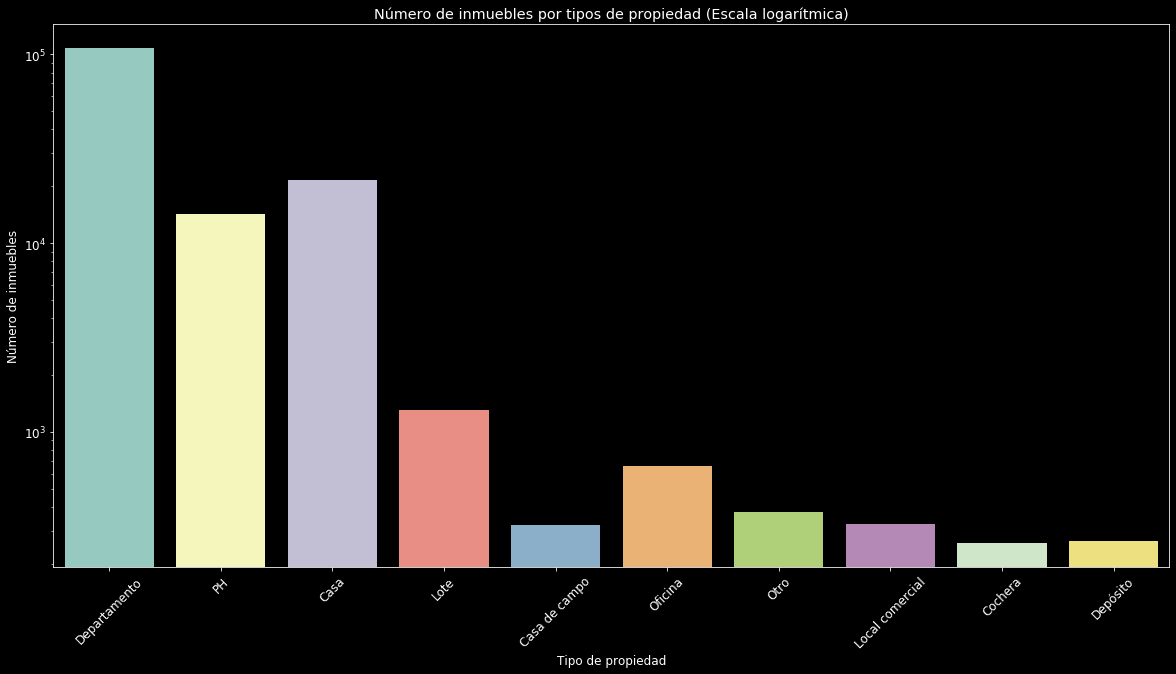

In [21]:
categories = df['property_type'].astype('category').cat.categories # List with object data type categories
print('\nEl dataset cuenta con', str(len(categories)), 'tipos de propiedad, estos son:', ' '.join([str(elem)+', ' for elem in categories]))
print('\n\n')

plt.figure(figsize=(20,10))                   # Fix plot size
plt.style.use('dark_background')               # Setting a dark theme
tipo_propiedad = sns.countplot(x = 'property_type', data = df) # Count graph for property_type
tipo_propiedad.set_yscale('log')  # As most of observations are from a certain category, the other cannot be distinguished
plt.title('Número de inmuebles por tipos de propiedad (Escala logarítmica)') # Titulo
plt.xlabel('Tipo de propiedad')                # X axis title
plt.ylabel('Número de inmuebles')              # Y axis title
plt.rcParams.update({'font.size': 23})         # Increase X axis labels font size
plt.xticks(rotation = 45)                      # Rotate labels
plt.show()

##### 4. ¿De qué regiones son las publicaciones? 


Las regiones son de las regiones: Bs.As. G.B.A. Zona Norte,  Bs.As. G.B.A. Zona Oeste,  Bs.As. G.B.A. Zona Sur,  Capital Federal,  donde se encuentran 89 barrios.





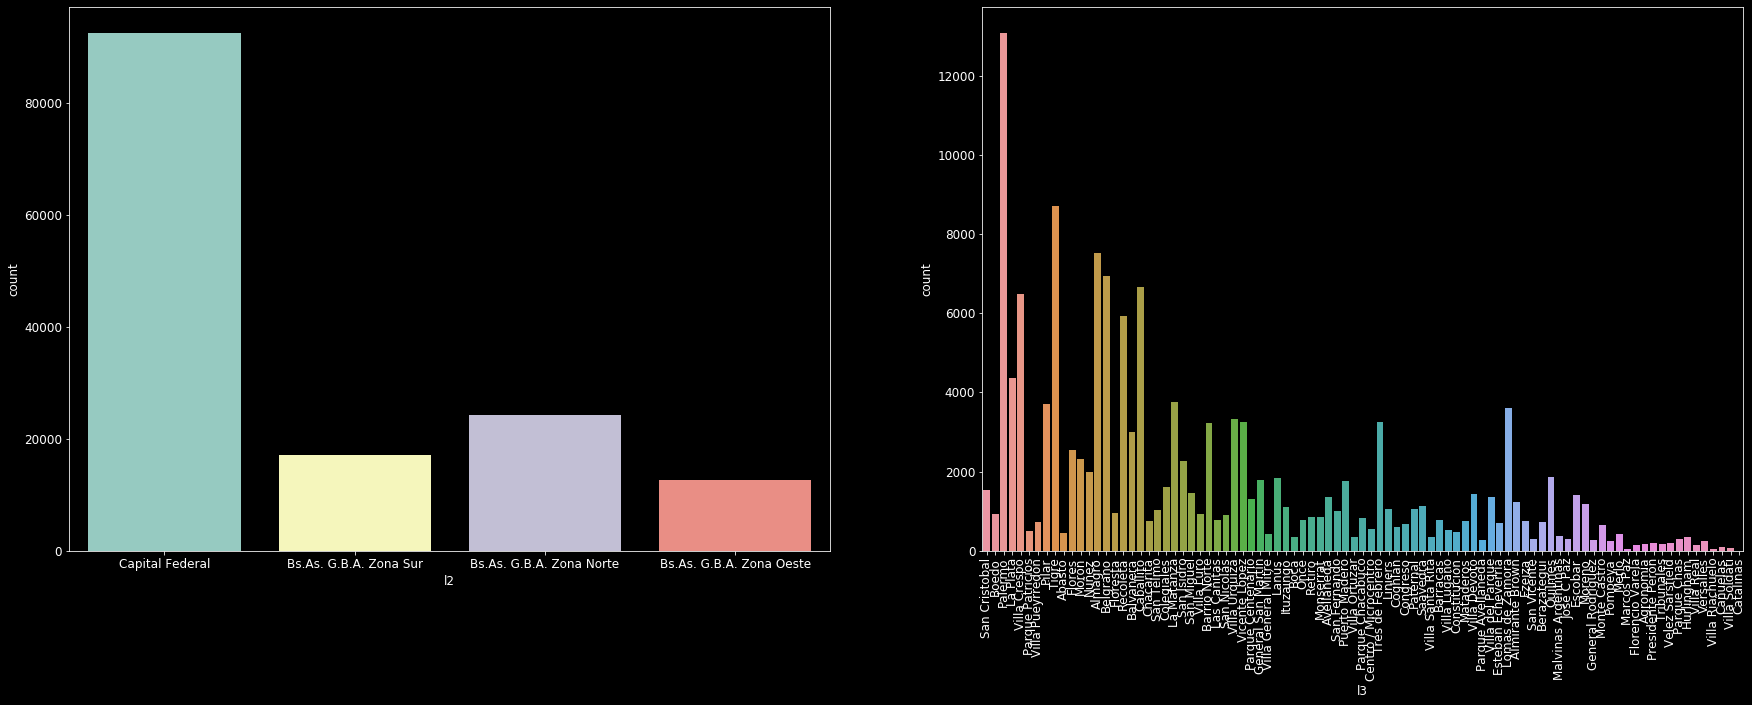

In [22]:
lista_regiones = df['l2'].astype('category').cat.categories
print('\nLas regiones son de las regiones:', ' '.join([str(elem)+', ' for elem in lista_regiones]), 'donde se encuentran', len(df['l3'].astype('category').cat.categories), 'barrios.')
print('\n\n')

plt.style.use('dark_background')                                   # Setting a dark theme
plt.rcParams.update({'font.size': 12})                             # Change font size
fig, ax = plt.subplots(1, 2, figsize=(30,10))                      # Create two subplots vertically

sns.countplot(df['l2'], ax = ax[0])                                # Countplot for l2
sns.countplot(df['l3'], ax = ax[1])                                # Countplot for l3

plt.xticks(rotation=90)                                            # Rotate second graph axis 90 degrees
plt.style.use('dark_background')                                   # Setting a dark theme
plt.show()

##### 5. Distribuciones y relaciones de a pares: Estudia la distribución y las relaciones de a pares de las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price para cada tipo de propiedad. 

###### A. Obten estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?

In [23]:
def numericas(db):                                 # Function for returning a list with the names of the numeric type variables
    vars = list(db.columns)                        # Create a list with DataFrame's column names
    data_num = ['float32', 'float64', 'int']       # A list with the numeric data types in python
    numeric_vars = []                              # Empty list where numeric variables names will be kept

    for i in range(5, db.shape[1]):                # Loop trough list indexes
        if db.iloc[:, i].dtype in data_num:        # Check if the variable dtype is any of the numeric types
            numeric_vars.append(vars[i])           # If so, append it to the list storing only numeric variables names
        else:                                      # If not, pass
            pass
    return numeric_vars                            # Return the list with the numeric variables names

numeric_vars = numericas(df)                       # Call the function
df_num = df[numeric_vars].dropna()                 # Create a new DataFrame with exclusively numeric variables
print(df_num.describe())                           # Print descriptive stats for numeric variables

               rooms       bedrooms      bathrooms  surface_total  \
count  122818.000000  122818.000000  122818.000000  122818.000000   
mean        3.130950       2.068345       1.591648     191.389650   
std         1.394685       1.084066       0.879062    1490.906401   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      52.000000   
50%         3.000000       2.000000       1.000000      78.000000   
75%         4.000000       3.000000       2.000000     138.000000   
max        35.000000      15.000000      14.000000  169000.000000   

       surface_covered         price  
count    122818.000000  1.228180e+05  
mean        112.118582  2.441321e+05  
std         898.847733  2.999523e+05  
min           1.000000  6.000000e+03  
25%          47.000000  1.150000e+05  
50%          68.000000  1.700000e+05  
75%         108.000000  2.690000e+05  
max      126062.000000  3.243423e+07  


###### B. Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. 

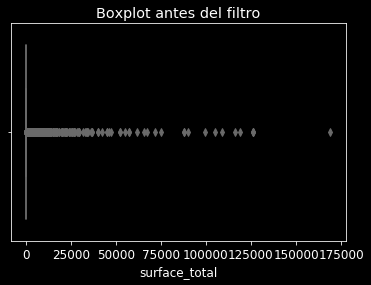

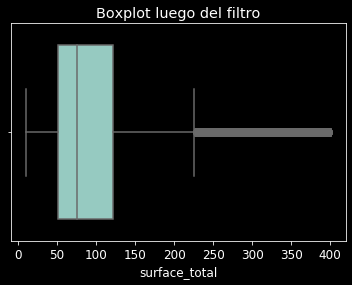

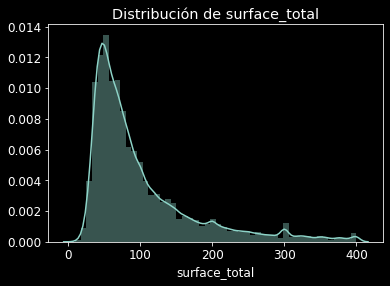

In [24]:
# Boxplot before filtering
plt.style.use('dark_background')  
sns.boxplot(df_num['surface_total'])
plt.title('Boxplot antes del filtro')
plt.show()
# Apply filter
df_num = df_num.drop(df_num.loc[df_num.surface_total > 400].index)
# Boxplot after filtering
plt.style.use('dark_background')  
sns.boxplot(df_num['surface_total'])
plt.title('Boxplot luego del filtro')
plt.show()
# Histogram
plt.style.use('dark_background')  
sns.distplot(df_num['surface_total'])
plt.title('Distribución de surface_total')
plt.show()

###### C. Lo mismo ocurre con valores de superficie total muy chico.

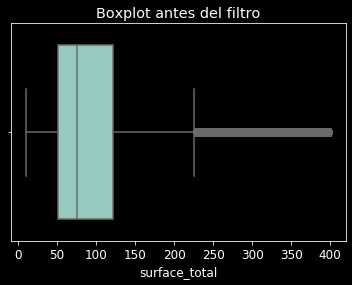

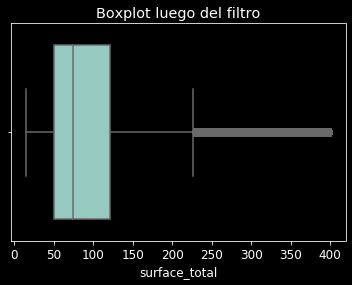

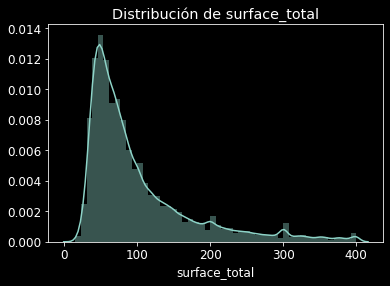

In [25]:
# Boxplot before filter
plt.style.use('dark_background') 
sns.boxplot(df_num['surface_total']).set_facecolor('black')
plt.title('Boxplot antes del filtro')
plt.show()
# Apply filter
df_num = df_num.drop(df_num.loc[df_num.surface_total < 15].index)
# Boxplot after filter
plt.style.use('dark_background') 
sns.boxplot(df_num['surface_total']).set_facecolor('black')
plt.title('Boxplot luego del filtro')
plt.show()
# Histogram
plt.style.use('dark_background') 
sns.distplot(df_num['surface_total']).set_facecolor('black')
plt.title('Distribución de surface_total')
plt.show()

###### D. Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.

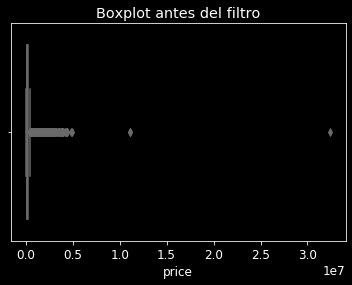

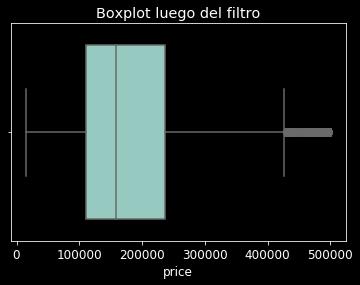

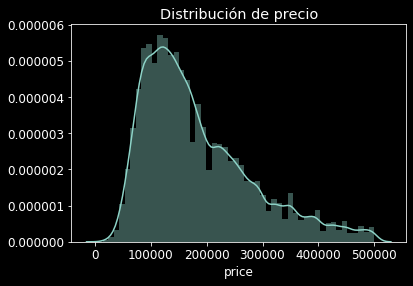

In [26]:
# Boxplot before filtering
plt.style.use('dark_background') 
sns.boxplot(df_num['price']).set_facecolor('black')
plt.title('Boxplot antes del filtro')
plt.show()
# Apply filter
df_num = df_num.drop(df_num.loc[df_num.price > 500000].index)
df_num = df_num.drop(df_num.loc[df_num.price <15000].index)
# Boxplot after filter
plt.style.use('dark_background') 
sns.boxplot(df_num['price']).set_facecolor('black')
plt.title('Boxplot luego del filtro')
plt.show()
# Histogram
plt.style.use('dark_background') 
sns.distplot(df_num['price']).set_facecolor('black')
plt.title('Distribución de precio')
plt.show()

###### E. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles.

In [27]:
df_num = df_num.drop(df_num.loc[df_num.surface_covered > df_num.surface_total].index)

###### F. Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

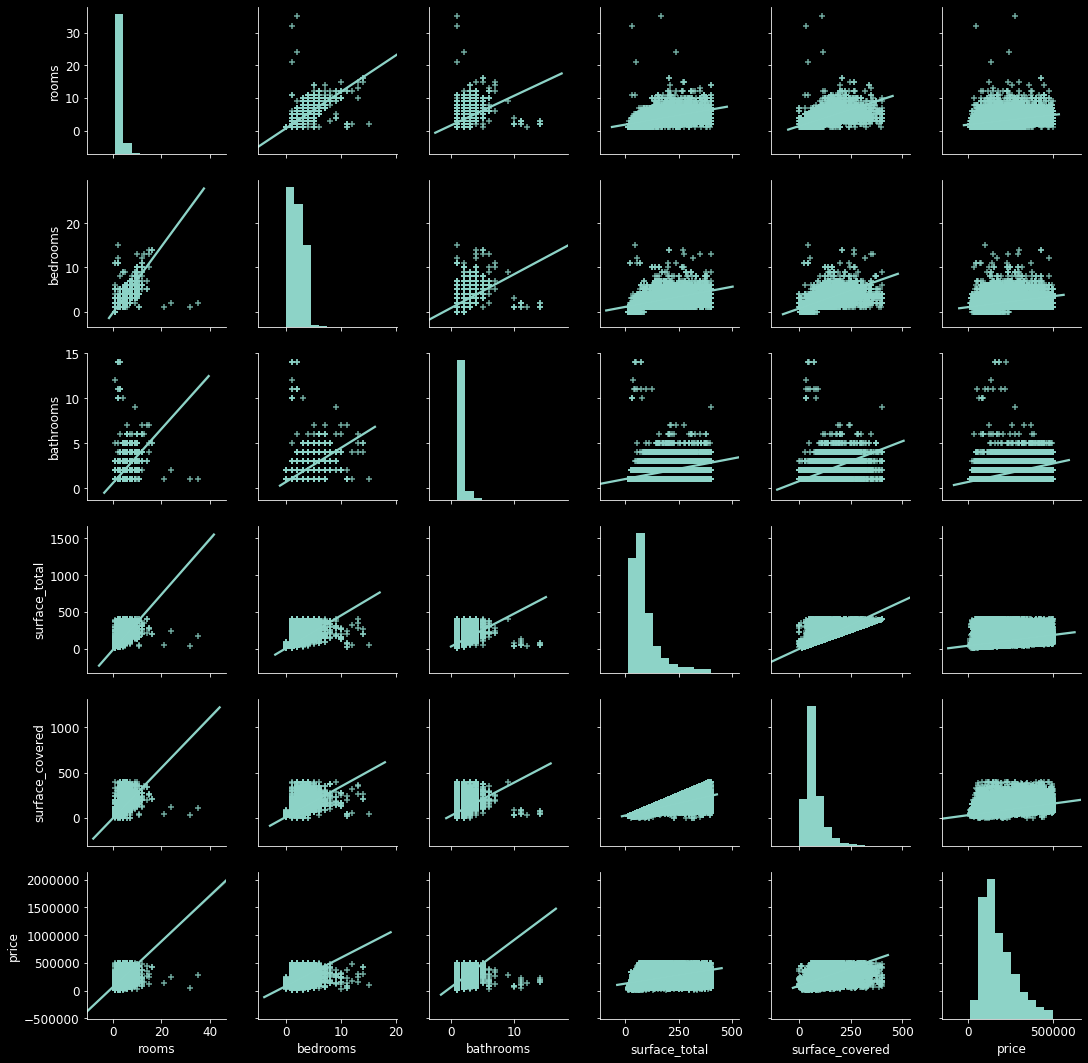

In [28]:
plt.style.use('dark_background') 
sns.color_palette("colorblind")
sns.pairplot(df_num, kind="reg", markers = "+") 
plt.show()

##### 6. Estudia la correlación entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

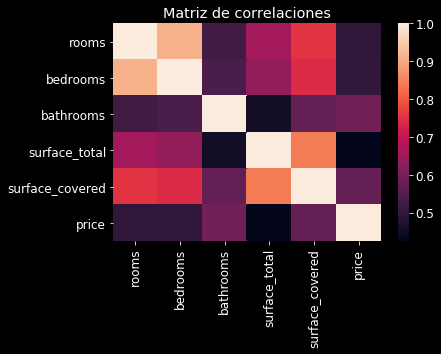

Las variables bedrooms, bathrooms, surface_covered,  pueden explicar bastante bien el precio. Las variables rooms, surface_total,  no.


In [44]:
plt.style.use('dark_background') 
sns.heatmap(df_num.corr())
plt.title('Matriz de correlaciones')
plt.show()

price_corr = df_num.corr()
variables = list(price_corr.columns)
price_corr = list(price_corr['price'])
variables = variables[:-1]
price_corr = price_corr[:-1]
altas = []
bajas = []

for i in range(len(variables)):

    if abs(price_corr[i]) >= 0.5:
        altas.append(variables[i])
    elif abs(price_corr[i]) < 0.5:
        bajas.append(variables[i])
        
print('Las variables', ''.join([str(elem)+', ' for elem in altas]), 'pueden explicar bastante bien el precio. Las variables',
     ''.join([str(elem)+', ' for elem in bajas]), 'no.')

## Tercera parte

#### Filtrado


#####    Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
#####    Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
#####    Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
#####    Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
#####    Descarta aquellas instacias con valores faltantes.


In [30]:
df = df.loc[df['l2'] == 'Capital Federal']                               # Filter those properties in Capital Federal
df = df.loc[df['property_type'].isin(['PH', 'Departamento', 'Casa'])]    # Filter by property type [P.H., Departamento, Casa]
df = df.drop(df.loc[df.surface_total < 15].index)                        # Filter properties with less than 15 sqm
df = df.drop(df.loc[df.surface_total > 1000].index)                      # Filter properties with more than 1000 sqm
df = df.drop(df.loc[df.price > 4000000].index)                           # Filler properties with more than 4 million dollars price tag
df = df.drop(df.loc[df.surface_covered > df.surface_total].index)       # Filter non-area logical observations
df = df.dropna()                                                         # Drop observations with missing values
df = df[numeric_vars].values                                             # Take only numeric variables 

#### K Nearest Neighbors

In [31]:
# Funcion for splitting between train and test and between features and labels

def split_data(db, split):
    # Check that split is lower to 1
    if split >= 1:
        raise Exception("Split must be betwenn 0 and 1") 
    # Split into train and test
    train, test = train_test_split(db, test_size=1-split, random_state = 21) 
    # Standarize
    standarize = StandardScaler().fit(train)
    train = standarize.fit_transform(train)
    test = standarize.fit_transform(test)
    # Split into features and labels
    x_train, y_train = train[:, :-1], train[:, -1]
    x_test, y_test = test[:, :-1], test[:, -1]
    
    return x_train, y_train, x_test, y_test

# Function to iterate between the odd numbers of a range

def knn_best_n(n, x_train, y_train, x_test, y_test):
    rmse_ = []
    for i in range(1, n, 2):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(x_train, y_train)
        knn_pred = knn.predict(x_test)
        mse = mean_squared_error(y_test, knn_pred)
        rmse = mse**(1/2)
        rmse_.append(rmse)
    return rmse_

# Function to plot the RMSE and return the number of neighbors that minimizes the error

def plot_rmse_knn(n, rmse_list):
    # List with the number of neighbors
    n_neighbors = list(range(1, n+1, 2))
    # Find the lower error
    min_rmse = min(rmse_list)
    # Find the index of the lower error
    min_n = rmse_list.index(min_rmse)
    # Plot the error
    plt.style.use('dark_background')
    plt.plot(n_neighbors, rmse_list)
    plt.suptitle('RMSE vs. número de vecinos')
    plt.ylabel('RMSE')
    plt.xlabel('Número de vecinos')
    plt.show()

    return n_neighbors[min_n], min_rmse

# Function to find the number of neighbors that minimizes the error and plot the predicted values against the true values

def knn(db, split, n):
    x_train, y_train, x_test, y_test= split_data(db, split)
    rmse_list = knn_best_n((n+1), x_train, y_train, x_test, y_test)
    n_min, min_rmse = plot_rmse_knn(n, rmse_list)
    knn = KNeighborsRegressor(n_neighbors=n_min)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    plt.figure(figsize=(20,10))
    plt.style.use('dark_background')
    plt.plot(knn_pred, y_test, marker = '^', linestyle="None")
    plt.suptitle('Predicciones vs.reales [K-Nearest Neighbors]')
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predichos')
    plt.show()
    
    print('El error se minimiza con {} vecinos en: {}'.format(n_min, min_rmse))

#### Random Forest

In [32]:
# Function to iterate across minimum number of observation per leaves

def best_rfr_nl(n, x_train, y_train, x_test, y_test):
    # Check the number of minimum observations in leaves is higher than 5
    if n < 6:
        raise Exception("Number of leaves must be higher than 5")
    rmse_ = []
    leaves = list(range(1, n+5))
    # To minimize computational cost limit to 10 iterations
    if len(leaves) > 10:
        leaves[-10:]
    # Iterate across different number of minimum observations per leave
    for i in leaves:
        rfr = RandomForestRegressor(n_estimators = 100, min_samples_leaf = i, random_state = 42)
        rfr.fit(x_train, y_train)
        rfr_pred = rfr.predict(x_test)
        mse = mean_squared_error(y_test, rfr_pred)
        rmse = mse**(1/2)
        rmse_.append(rmse)
    return leaves, rmse_

# Function to plot the RMSE and return the number of observations per leave that minimizes the error

def plot_rmse_rfr(leaves, rmse_list):
    # Find the smallest error
    min_rmse = min(rmse_list)
    # Find the index of the smallest error
    min_n = rmse_list.index(min_rmse)
    # Plot error
    plt.style.use('dark_background')
    plt.plot(leaves, rmse_list)
    plt.suptitle('RMSE vs. número mínimo de elementos por hojas')
    plt.ylabel('RMSE')
    plt.xlabel('Número mínimo de observaciones por hojas')
    plt.show()

    return leaves[min_n], min_rmse

# Function to find the number of leaves that minimizes the error and plot predicted values against true values

def rfr(db, split, n):
    x_train, y_train, x_test, y_test = split_data(db, split)
    leaves, rmse_list = best_rfr_nl(n, x_train, y_train, x_test, y_test)
    min_leaves, min_rmse = plot_rmse_rfr(leaves, rmse_list)
    rfr = RandomForestRegressor(n_estimators = 1000, min_samples_leaf = min_leaves, random_state = 42)
    rfr.fit(x_train, y_train)
    rfr_pred = rfr.predict(x_test)
    plt.figure(figsize=(20,10))
    plt.style.use('dark_background')
    plt.plot(rfr_pred, y_test, marker = '^', linestyle="None")
    plt.suptitle('Predicciones vs.reales [Random Forest Regression]')
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predichos')
    plt.show()
    
    print('El mínimo error se alcanza con {} observaciones como minimo en las hojas y es: {}'.format(min_leaves, min_rmse))

#### Epsilon-Support Vector Regression

In [33]:
# Function to iterate across different regularization coefficients 

def best_reg(min_, max_, x_train, y_train, x_test, y_test):
    if min_ < 0:
        raise Exception('Coefficient cannot be lower than 0')
    if max_ - min_ > 10:
        raise Excpetion('Computational cost is too high')
    rmse_ = []
    coeffs = list(np.arange(min_, max_, 0.5))
    for i in coeffs:
        svm = SVR(kernel = 'linear', C = i, epsilon = 0.2)
        svm.fit(x_train, y_train)
        svm_pred = svm.predict(x_test)
        mse = mean_squared_error(y_test, svm_pred)
        rmse = mse**(1/2)
        rmse_.append(rmse)
    return coeffs, rmse_

# Function to plot the RMSE and return the coefficient that minimizes the error

def plot_rmse_svm(coeffs, rmse_list):
    # Encontrar el error mínimo
    min_rmse = min(rmse_list)
    # Encontrar el índice del número que mínimiza el error
    min_n = rmse_list.index(min_rmse)
    # Gráficar el error
    plt.style.use('dark_background')
    plt.plot(coeffs, rmse_list)
    plt.suptitle('RMSE vs. coefficiente de regularizacion')
    plt.ylabel('RMSE')
    plt.xlabel('Coeficiente para l2')
    plt.show()

    return coeffs[min_n], min_rmse

# Funtion that finds the coefficient than minimizes the error and plot the predicted values against the true values

def svm(db, split, min_, max_):
    x_train, y_train, x_test, y_test = split_data(db, split)
    coeffs, rmse_list = best_reg(min_, max_, x_train, y_train, x_test, y_test)
    min_coeff, min_rmse = plot_rmse_svm(coeffs, rmse_list)
    svm = SVR(kernel = 'linear', C=min_coeff, epsilon=0.2)
    svm.fit(x_train, y_train)
    svm_pred = svm.predict(x_test)
    plt.figure(figsize=(20,10))
    plt.style.use('dark_background')
    plt.plot(svm_pred, y_test, marker = '^', linestyle="None")
    plt.suptitle('Predicciones vs.reales [SVM Regression]')
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predichos')
    plt.show()
    
    print('El mínimo error se alcanza con un coefficiente de {} y es: {}'.format(min_coeff, min_rmse))

##### La métrica seleccionada fue la raíz del error cuadrático medio (RMSE siglas en inglés). Se seleccionó esta métrica pues castiga fuertemente los errores altos y pese a que sigue castigando los errores pequeños, lo hace en menor proporción que os grandes. La función *split* toma la base de datios y un número entre 0 y 1 el cual indica la proporción de datos que se toman como datos de entrenamiento. También, la función split estandariza las vaiables dependiente e independientes e igualmente las divide entre la variable a predecir (Y o *label*) que es el precio, para los cual se cuenta con seis variables (*features* o X_i). Los tres modelos se componen de tres funciones, la primera itera sobre un hiperparámetro flexible del modelo como el número de vecinos (KNN), el número mínimo de observaciones en las hojas (*Random Forest*) y el coefficiente de castigo para la regularización L2 (SVM). Dentro de las iteraciones se encuentran los modelos indicados en las instrucciones y se prueban otros hiperparámetros que mejoran el desempeño de los modelos. Así mismo, se toman los valores de estos hiperparámetros que minimizan el error y se gráfican los valores predichos contra los reales. 

##### En cuanto al modelo *benchmark*, Hujia Yu y Jiafu Wu entrenaron differentes modelos con la finalidad de predecir el precio. Dentro de los algoritmos usados se *Random Forest*, SVM y regresiones como la tradicional, Ridge y Lasso. La base de datos usada tenía un número considerablemente inferior de obsrvaciones (1460), aunque cn 79 características. El algoritmo de *Random Forest* tuvo un RMSE de 0.5397. Es importante resaltar que contar con 79 características puede ayudar sustancialmente en el aprendizaje del algoritmo. Además, acompañar estos algoritmos con otros que hagan un cluster previo también pueden disminuir el error, pues algunas carcterísticas pueden influir más en el precio de los inmuebles con ciertas características en común que en otros. 

##### *Hujia Yu, Jiafu Wu, (2016). Real Estate Price Prediction with Regression and Classification. Stanford University Alumn Project*

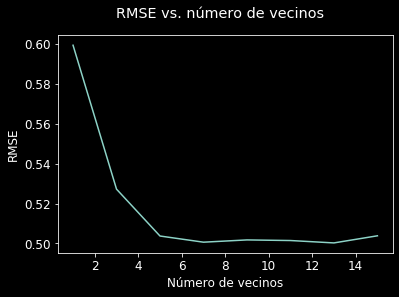

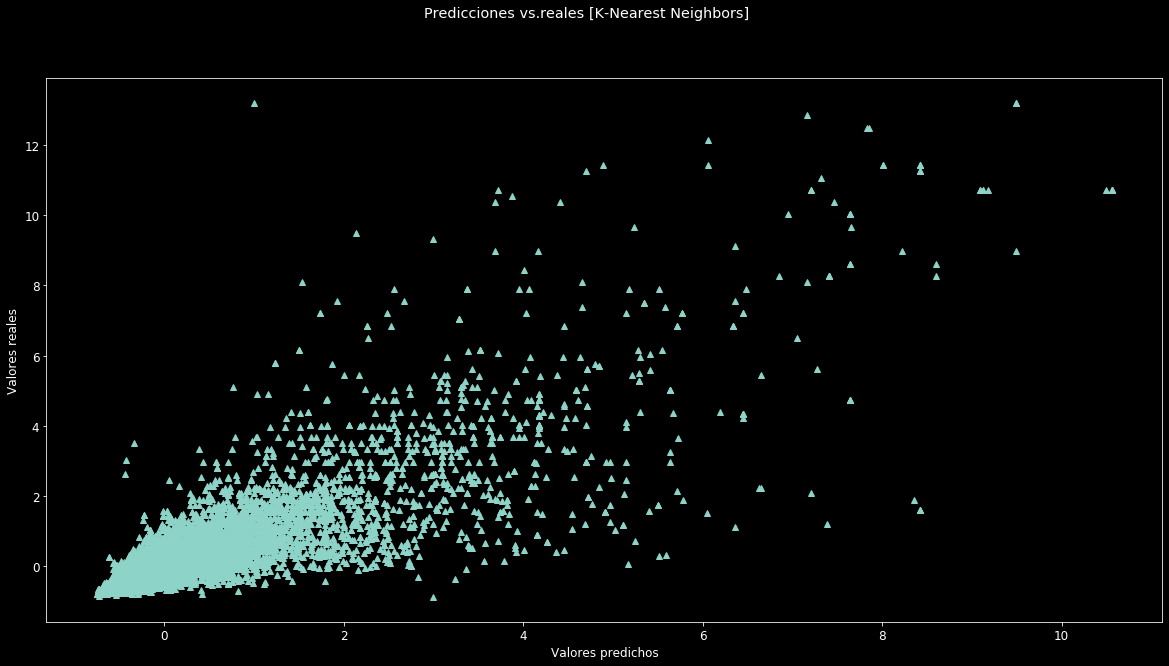

El error se minimiza con 13 vecinos en: 0.5002822490423753


In [34]:
knn(df, 0.7, 16)

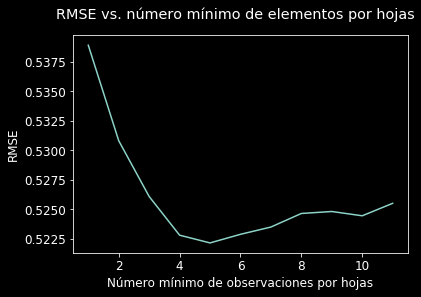

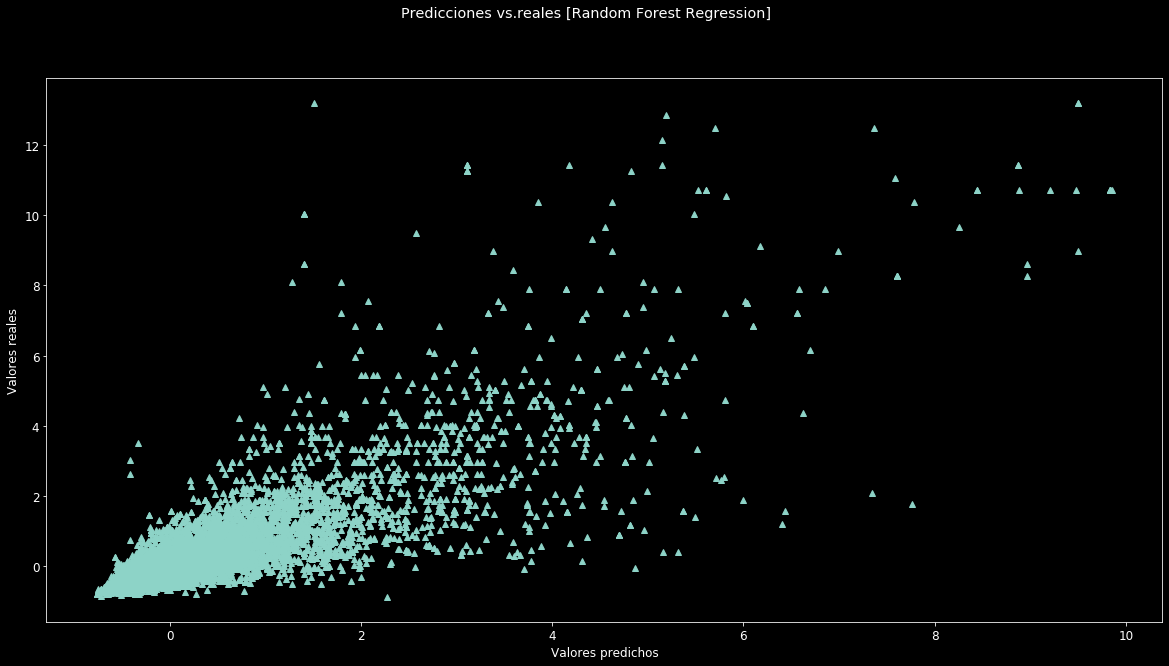

El mínimo error se alcanza con 5 observaciones como minimo en las hojas y es: 0.5221568882085306


In [35]:
rfr(df, 0.7, 7)

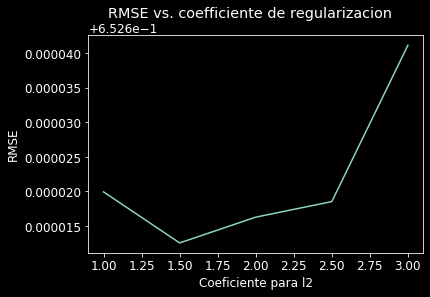

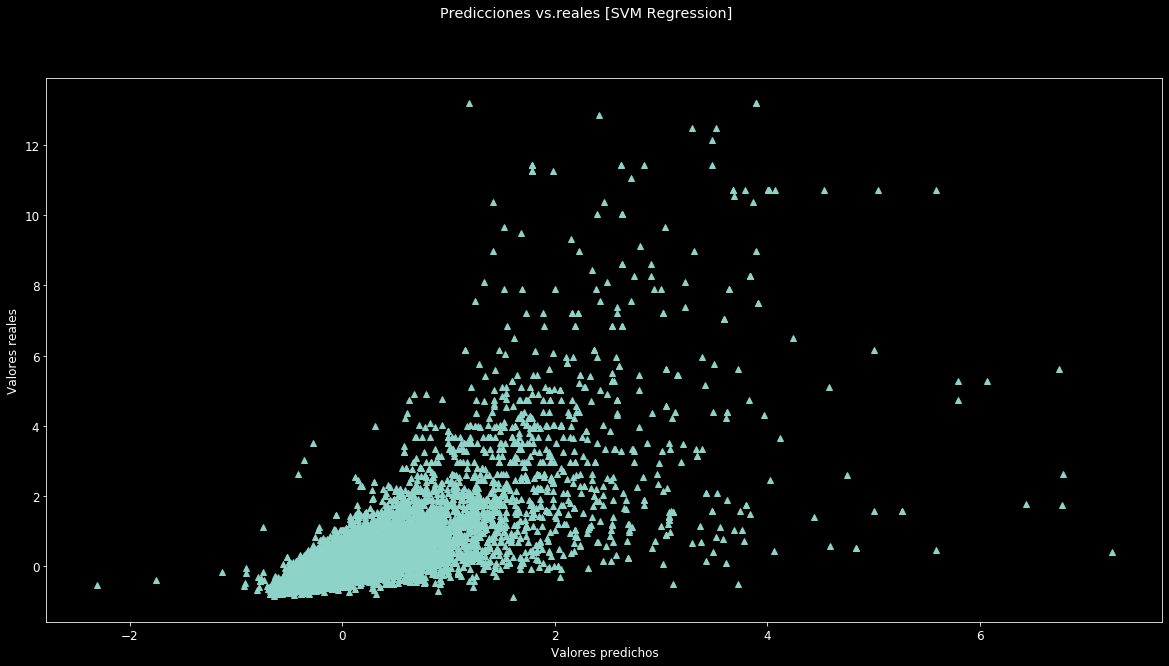

El mínimo error se alcanza con un coefficiente de 1.5 y es: 0.652612553219322


In [36]:
svm(df, 0.7, 1, 3.5)

##### ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

##### Algunas características importantes de los inmuebles no están incluidas en el *dataset*. La ubicación, el piso, las amenidades del sector y de la propiedad horizontal, la antiguedad y acabados puede influir significativamente en el precio y son datos con los que no se cuentan. Se advierte que esto puede disminuir fuertemente el desmepeño de los modelos. Por otro lado, el hecho de contar con dos áreas puede generar problemas de multicolinealidad. Esto explica justamente que el coeficientee más pequeños sean una de las variables relacionadas con el área de los inmuebles, lo mismo ocurre con el número de salones (*rooms*), que esta implicito en el número de habitaciones (*bedrooms*). Estas dos variables *rooms* y *surface_total* tienen los coeficientes de correlacón más pequeños e inferiores a 0.5.

##### El error de KNN fue 0.5, el de Random Forest fue 0.52 y el de SVM 0.65. Estos resultados no son congruentes con los modelos *benchmark*, donde el SVM era el de mejor desempeño y la diferencia entre el entrenado mayor en 1.4. Sin embargo, los resultados del *Random Forest* son superiores al modelo *benchmark* en términos del error, pues el RMSE de *Random Forest* estuvo 0.01 por debajo de los del paper. Finalmente, el KNN pudo llegar a un error de 0.5, lo que es  inferior a todos los modelos de regresiones del *benchmark*, pues el menor tenía 0.52 de RMSE.

##### La mejora en los errores de los modelos con respecto al *benchmark* puede explicarse por la diferencia entre grupos de observaciones. Dado que el *dataset* con el que se entrenaron los modelos era 50 veces más grande, aunque no tenía tantas características. Por lo anterior, el modelo que escogería es aquel que minimiza el error, esto es, un KNN con 13 vecinos. 

## Cuarta parte

#### Crea una arquitectura de datos para mostrar una arquitectura de solución en alguna nube

##### Para el diseño de la arquitectura de los datos en la nube es importante comenzar por el aLacenamiento o descarga de los datos directamente en el servicio *Cloud*. Un simple *bucket* en S3 de AWS o un *bucket* en *Data Storage* de GCP, aunque por el *Cloud Shell* de GCP pueden descargarse estos datos directaente a *BigQuery* y disminuir el costo si no son demasiados datos, pues aquello tendría consecuencias en el desempeño de la máquina virtual. Antes de comenzar a entrenar el modelo, es imporante hacer un análisis de los datos, su distribucón, outliers y *missing values*. Para ver esto gráficamente en GCP se puede crear el *dataset* en *BigQuery* en GCP que da acceso a los datos desde *Data Studio*, por su parte, en AWS la exploración de datos debe hacerse en *Athenea*. *BigQuery* es una instancia central en GCP, pues allí también se puede hacer el ETL de la base de datos, desarrollar el modelo y mantiene *Data Studio* para visualizar los resultados. Por su parte, en AWS es necesario usar *SageMaker Studio Studio* o *Neo*. Finalmente, si se requieren predicciones a tiempo real es posible hacer uso de *Dataflow* para alimentarlo en tiempo real en GCP o en AWS Data *Pipeline*.